 # Détermination de 5 inconnus avec 5 équations par bilan matière  

Nous considérerons un séparateur avec 1 entrée (numérotée 1) et deux sorties (numérotée 2 et 3) fonctionnant avec un mélange binaire de constituants A et B dont les compositions sont données par des fractions, $x_A$ et $x_B$. Les débits globaux sont notés $F_T$ et les partiels, $F_A$ et $F_B$. 

>Le bloc de code ci-dessous permet de dessiner le flowsheet et de faire apparaître les débits globaux et partiels ainsi que les compositions des trois courants.

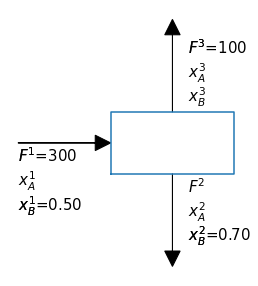

In [16]:
import numpy as np
import matplotlib.pyplot as plt

xs, ys = 40, 40       #position du separateur
lx, ly = 40, 20       #taille du separateur
la, hla, hwa=25, 5,5  #taille des fleches

#tracé du flowsheet
def plot_flowsheet_sd():
    fig, ax = plt.subplots(figsize=(5, 5)) 
    ax.set_aspect( 1 )
    plt.axis('off')
    plt.plot([xs,xs+lx,xs+lx,xs,xs],[ys,ys,ys+ly,ys+ly,ys])
    #plt.plot([xs,xs+lx],[ys,ys+ly],'b--')
    plt.arrow(xs-la-hla,ys+ly/2,la,0, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs+lx/2,ys,0,-la, head_width=hwa, head_length=hla, fc='k', ec='k')
    plt.arrow(xs+lx/2,ys+ly,0,la, head_width=hwa, head_length=hla, fc='k', ec='k')
    #plt.text(45,48,'Séparateur',c='b', size=15)
    plt.text(xs-la-hla,ys+ly/2-6, r"$F^1$", size=15)
    plt.text(xs-la-hla,ys+ly/2-14, r"$x^1_A$", size=15)
    plt.text(xs-la-hla,ys+ly/2-22, r"$x^1_B$", size=15)
    plt.text(xs+lx/2+5,ys-6, r"$F^2$", size=15)
    plt.text(xs+lx/2+5,ys-14, r"$x^2_A$", size=15)
    plt.text(xs+lx/2+5,ys-22, r"$x^2_B$", size=15)
    plt.text(xs+lx/2+5,ys+ly+25-6, r"$F^3$", size=15)
    plt.text(xs+lx/2+5,ys+ly+25-14, r"$x^3_A$", size=15)
    plt.text(xs+lx/2+5,ys+ly+25-22, r"$x^3_B$", size=15)

#Les 4 paramètres fixés
FT1=300
XB1=0.5
XB2=0.7
FT3=100

#Analyse de la cohérence du jeu de données
if ((FT1*XB1)-(FT1-FT3)*XB2)/FT3 >1:
    print ('Attention le jeu de données ne correspond pas à une solution physique')
    print ('XB3>1, il y a soit :')
    print ('      i)   trop de B en entrée (essayez de réduire XB1 ou FT1)' )
    print ('      ii)  pas assez de B en sortie 2 (essayez d augmenter XB2 ou FT2=FT1-FT3)' )
if ((FT1*XB1)-(FT1-FT3)*XB2)/FT3 <0:
    print ('Attention le jeu de données ne correspond pas à une solution physique')
    print ('XB3<0, il y a soit :')
    print ('      i)   pas assez de B en entrée (essayez d augmenter XB1 ou FT1)' )
    print ('      ii)  trop de B en sortie 2 (essayez de réduire XB2 ou FT2=FT1-FT3)' )    
#Tracé des 4 paramètres fixés sur le flowsheet
def plot_flowsheet_data():
    plt.text(xs-la-hla,ys+ly/2-6, r"$F^1$"+'={}'.format(FT1), size=15)
    plt.text(xs-la-hla,ys+ly/2-22, r"$x^1_B$"+'={:.2f}'.format(XB1), size=15)
    plt.text(xs+lx/2+5,ys-22, r"$x^2_B$"+'={:.2f}'.format(XB2), size=15)
    plt.text(xs+lx/2+5,ys+ly+25-6, r"$F^3$"+'={}'.format(FT3), size=15)
def plot_flowsheet():
    plot_flowsheet_sd()
    plot_flowsheet_data()  
plot_flowsheet()
plt.show()

1- Qu’est ce qui vous semble manquer sur ce schéma ? Faites des hypothèses qui vous semblent cohérentes pour le compléter. 

> Il manque les unités. Si les fractions sont molaires alors les débits devront être exprimés en mole par unité de temps. Si les fractions sont massiques alors les débits devront être exprimés en masse par unité de temps. 
>
> Considérons par exemple que les fractions sont molaires (nous utilisons dans ce cours x pour les fractions molaires) et que les débits sont en moles par heure.

2- Ecrire 5 équations reliant les inconnues.

>Les équations, permettant de décrire les bilans de matière, sont les suivantes :
>
>**Bilan sur le débit global**
>1. $F^1_T=F^2_T+F^3_T$
>
>**Bilan sur les débits partiels de A et de B**
>
>2. $F^1_A=F^2_A+F^3_A$ soit $F^1_T x^1_A=F^2_T x^2_A+F^3_T x^3_A$
>3. $F^1_B=F^2_B+F^3_B$ soit $F^1_T x^1_B=F^2_T x^2_B+F^3_T x^3_B$
>
>**Lien entre les différentes fractions molaires**
>
>4. $x^1_A+x^1_B=1$
>5. $x^2_A+x^2_B=1$
>6. $x^3_A+x^3_B=1$
>
>Il y a donc 6 équations pour 9 inconnues 
>
>$F^1_T,F^2_T,F^3_T,x^1_A,x^2_A,x^3_A,x^1_B,x^2_B,x^3_B$. 
>
>Il faut cependant noter que ces équations ne sont pas indépendantes puisque la première est la somme >des équations 2 et 3 en considérant les équations 4, 5 et 6.
>
>Il y a donc seulement **5 équations indépendantes** qui forment un système comportant **9 inconnues**. Il faut donc **fixer 4 variables** pour obtenir une solution unique et déterminer les 5 inconnues à l'aide de 5 équations.
>
>On a fixé dans cet exercice les 4 paramètres suivants : $F^1_T,F^3_T,x^1_B,x^2_B$. Les 5 équations nous permettront alors de déterminer les 5 inconnues : $F^2_T,x^1_A,x^2_A,x^3_A,x^3_B$
>
>Les lignes de codes ci-dessous permettent de visualiser les 4 données fixées et de vérifier si une solution "physique" existe. Si ce n'est pas le cas, un message s'affiche pour vous dire dans quel sens modifier les 4 données pour retomber sur un problème ayant une solution physique. Vous pouvez donc vous exercer en changeant le jeu des 4 paramètres fixés et refaire les calculs. 
>
>A noter que si vous choisissez $x^1_B=x^2_B$, il s'agit d'un simple diviseur de courant qui ne modifie pas la composition des courants de sortie.

3- Déterminer les inconnues.

> Les blocs suivant permettent d'appliquer les différents bilans (équations par équations) pour déterminer l'ensemble des inconnues. Vous pouvez donc exécuter les blocs successivement pour comprendre comment on arrive à déterminer l'ensemble des inconnues. 

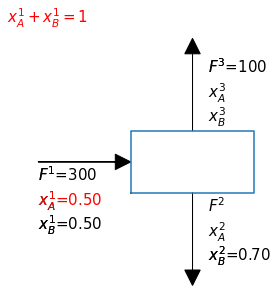

In [17]:
plot_flowsheet()
XA1=1-XB1
plt.text(xs-la-hla,ys+ly/2-14, r"$x^1_A$"+'={:.2f}'.format(XA1), color='r',size=15)
plt.text(0,95, r"$x^1_A+x^1_B=1$", color='r',size=15)
plt.show()

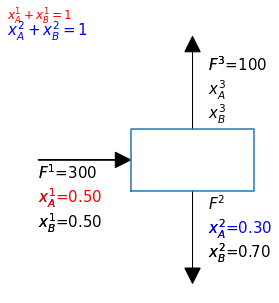

In [18]:
plot_flowsheet()
XA1=1-XB1
plt.text(xs-la-hla,ys+ly/2-14, r"$x^1_A$"+'={:.2f}'.format(XA1), color='r',size=15)
plt.text(0,95, r"$x^1_A+x^1_B=1$", color='r',size=12)
XA2=1-XB2
plt.text(xs+lx/2+5,ys-14, r"$x^2_A$"+'={:.2f}'.format(XA2), color='b',size=15)
plt.text(0,90, r"$x^2_A+x^2_B=1$", color='b',size=15)
plt.show()

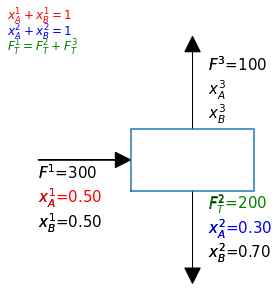

In [19]:
plot_flowsheet()
XA1=1-XB1
plt.text(xs-la-hla,ys+ly/2-14, r"$x^1_A$"+'={:.2f}'.format(XA1), color='r',size=15)
plt.text(0,95, r"$x^1_A+x^1_B=1$", color='r',size=12)
XA2=1-XB2
plt.text(xs+lx/2+5,ys-14, r"$x^2_A$"+'={:.2f}'.format(XA2), color='b',size=15)
plt.text(0,90, r"$x^2_A+x^2_B=1$", color='b',size=12)
FT2=FT1-FT3
plt.text(xs+lx/2+5,ys-6, r"$F^2_T$"+'={}'.format(FT2), color='g',size=15)
plt.text(0,85, r"$F^1_T=F^2_T+F^3_T$", color='g',size=12)
plt.show()

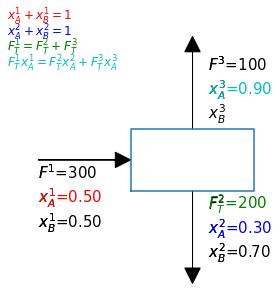

In [20]:
plot_flowsheet()
XA1=1-XB1
plt.text(xs-la-hla,ys+ly/2-14, r"$x^1_A$"+'={:.2f}'.format(XA1), color='r',size=15)
plt.text(0,95, r"$x^1_A+x^1_B=1$", color='r',size=12)
XA2=1-XB2
plt.text(xs+lx/2+5,ys-14, r"$x^2_A$"+'={:.2f}'.format(XA2), color='b',size=15)
plt.text(0,90, r"$x^2_A+x^2_B=1$", color='b',size=12)
FT2=FT1-FT3
plt.text(xs+lx/2+5,ys-6, r"$F^2_T$"+'={}'.format(FT2), color='g',size=15)
plt.text(0,85, r"$F^1_T=F^2_T+F^3_T$", color='g',size=12)
XA3=(FT1*XA1-FT2*XA2)/FT3
plt.text(xs+lx/2+5,ys+ly+25-14, r"$x^3_A$"+'={:.2f}'.format(XA3), color='c',size=15)
plt.text(0,80, r"$F^1_T x^1_A=F^2_T x^2_A+F^3_T x^3_A$", color='c',size=12)
plt.show()

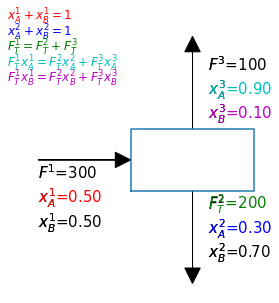

In [21]:
plot_flowsheet()
XA1=1-XB1
plt.text(xs-la-hla,ys+ly/2-14, r"$x^1_A$"+'={:.2f}'.format(XA1), color='r',size=15)
plt.text(0,95, r"$x^1_A+x^1_B=1$", color='r',size=12)
XA2=1-XB2
plt.text(xs+lx/2+5,ys-14, r"$x^2_A$"+'={:.2f}'.format(XA2), color='b',size=15)
plt.text(0,90, r"$x^2_A+x^2_B=1$", color='b',size=12)
FT2=FT1-FT3
plt.text(xs+lx/2+5,ys-6, r"$F^2_T$"+'={}'.format(FT2), color='g',size=15)
plt.text(0,85, r"$F^1_T=F^2_T+F^3_T$", color='g',size=12)
XA3=(FT1*XA1-FT2*XA2)/FT3
plt.text(xs+lx/2+5,ys+ly+25-14, r"$x^3_A$"+'={:.2f}'.format(XA3), color='c',size=15)
plt.text(0,80, r"$F^1_T x^1_A=F^2_T x^2_A+F^3_T x^3_A$", color='c',size=12)
XB3=(FT1*XB1-FT2*XB2)/FT3
plt.text(xs+lx/2+5,ys+ly+25-22, r"$x^3_B$"+'={:.2f}'.format(XB3), color='m',size=15)
plt.text(0,75, r"$F^1_T x^1_B=F^2_T x^2_B+F^3_T x^3_B$", color='m',size=12)
plt.show()